Optimal coefficients:
a = 0.32354744690104165
b = -0.34422895602340664
Mean Squared Error (MSE): 10.115059854779235


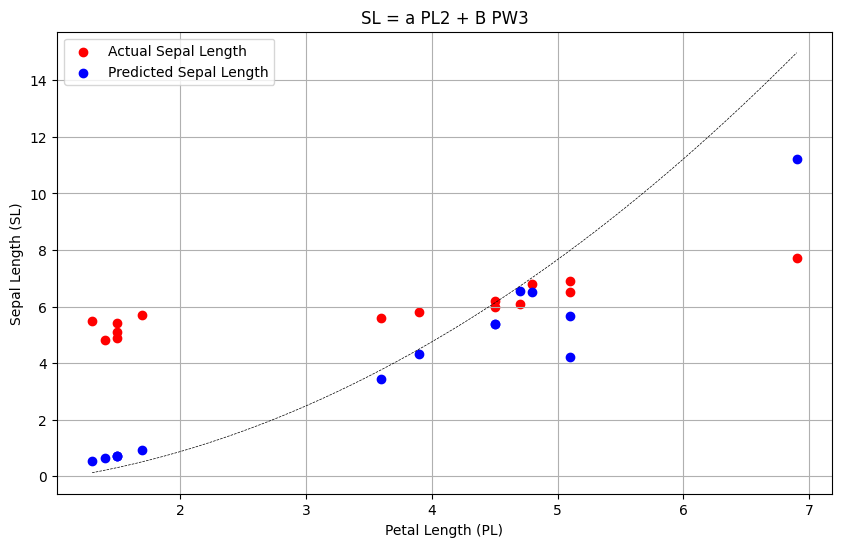

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

irisData = load_iris()
X = irisData.data 
y = X[:, 0] 

# Define the nonlinear model function
def nonlinear_model(X, a, b):
    PL_squared = X[:, 2]**2 
    PW_cubed = X[:, 3]**3   
    return a * PL_squared + b * PW_cubed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
popt, _ = curve_fit(nonlinear_model, X_train, y_train)
a_opt, b_opt = popt

print("Optimal coefficients:")
print("a =", a_opt)
print("b =", b_opt)
y_pred = nonlinear_model(X_test, a_opt, b_opt)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(10, 6))

# Extract Petal Length and Petal Width from test data
PL_test = X_test[:, 2]
PW_test = X_test[:, 3]

# Scatter plot for actual vs predicted
plt.scatter(PL_test, y_test, color='red', label='Actual Sepal Length')
plt.scatter(PL_test, y_pred, color='blue', label='Predicted Sepal Length')

# Generate a range of Petal Length values for plotting the curve
PL_range = np.linspace(PL_test.min(), PL_test.max(),50)
PW_fixed = np.mean(PW_test)  # Use the mean Petal Width from the test set for the curve

# Predict Sepal Length values using the range of Petal Length values and the mean Petal Width
grid_points = np.column_stack([np.zeros_like(PL_range), np.zeros_like(PL_range), PL_range, np.full_like(PL_range, PW_fixed)])
curve_values = nonlinear_model(grid_points, a_opt, b_opt)

plt.plot(PL_range, curve_values, 'k--', lw=0.5)

plt.xlabel('Petal Length (PL)')
plt.ylabel('Sepal Length (SL)')
plt.title('SL = a PL2 + B PW3')
plt.legend()
plt.grid(True)
plt.show()
